In [1]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import cProfile
import io
import pstats

from src_parallel import helperfuncs
from src_parallel import classify_parallel as classify
from src_parallel import cluster

In [2]:
folderPath = 'C:/My Documents/TUD-MCL/Semester 4/Thesis/Implementation/Data/Dataset-1/' # Maxime/' #sample 2/'
imgName = '18_04_27_Thomas_28618_0016.dm3'

radius=23
startPosList= [[84-radius,404-radius],[97-radius,404-radius],[88-radius,404-radius]]
NumMainclasses=4
MinNumberInClass=4
MaxNumberInClass=100
rerun = 15

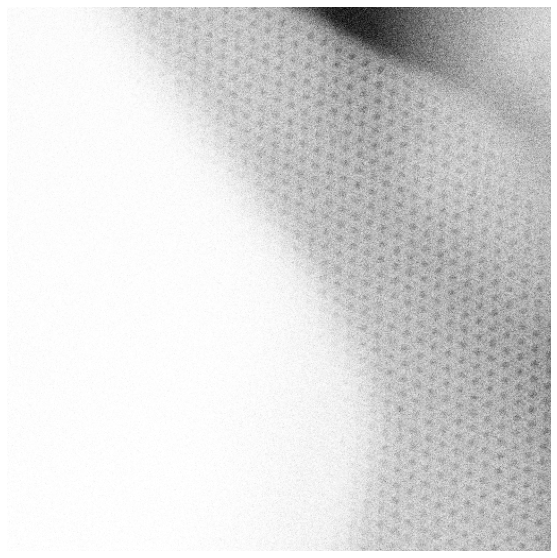

In [3]:
imgs = helperfuncs.loadData(folderPath=folderPath, fileName=imgName)

n2_max=len(imgs)
n=0
plt.figure(figsize=(10, 10*n2_max)) 
for img in imgs:
    n+=1    
    vstd=np.std(img)
    vmean=np.mean(img)         
    ax1=plt.subplot(1,n2_max,n)
    ax1.imshow(img,cmap='gray',vmin=np.min(img),vmax=np.max(img))
    ax1.axis('off')

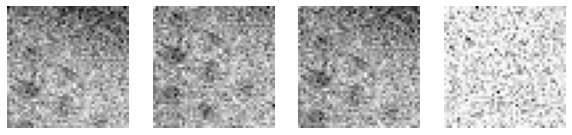

In [4]:

templates = helperfuncs.generateTemplates(startPosList=startPosList, imgs=imgs, radius=radius)
templates = helperfuncs.findDissimilarTemplates(templates = templates, imgs = imgs, radius = radius, minTemplateClasses = NumMainclasses)

n1=0
n_max=len(templates)
plt.figure(figsize=(10, 10*n_max)) 

for jt in range(len(templates)):
    n1+=1
    plt.subplot(1, n_max, n1)
    plt.imshow(templates[jt], cmap='gray')
    plt.axis('off')

In [5]:
while rerun>0:
    templates = classify.tempfuncname(radius=radius, imgs=imgs, templates=templates, maxNumberInClass=MaxNumberInClass, minNumberInClass=MinNumberInClass)
    rerun-=1

In [6]:
backplot, mymin, mymax, templateMatchingResults = classify.backplotImg(radius, imgs, templates)

Used 1141subimages


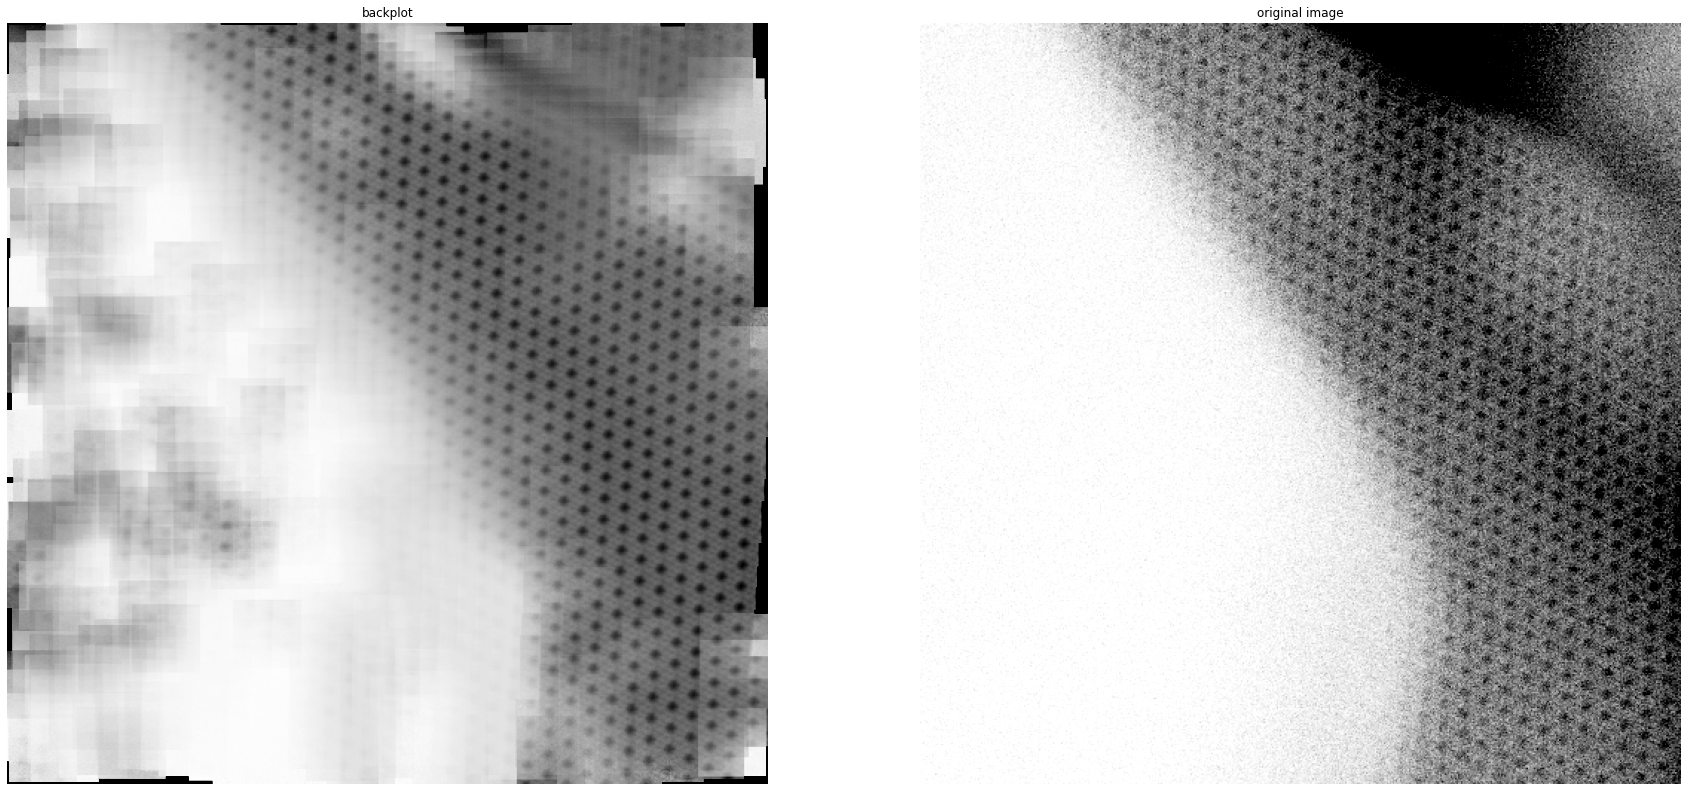

In [7]:
for i in range(len(imgs)):
    plt.figure(figsize=(2*15, 2*7)) 
    ax1=plt.subplot(1,2,1)                    
    ax1.imshow(backplot[i],cmap=plt.cm.gray,vmin=mymin[i],vmax=mymax[i])
    ax1.set_title('backplot')
    ax1.axis('off')
    ax2=plt.subplot(1,2,2)                    
    ax2.imshow(imgs[i],cmap=plt.cm.gray,vmin=mymin[i],vmax=mymax[i])
    ax2.set_title('original image')
    ax2.axis('off')
    plt.show()

In [8]:
picDic = cluster.sortTemplates(imgs, templateMatchingResults, radius, templates)

Used 1141subimages


In [9]:
centroidDic = cluster.cluster(radius, templates, picDic)

In [13]:
backplotFinal, min, max = cluster.backplotFinal(centroidDic, picDic, imgs, radius, templateMatchingResults)    

Used 1141subimages


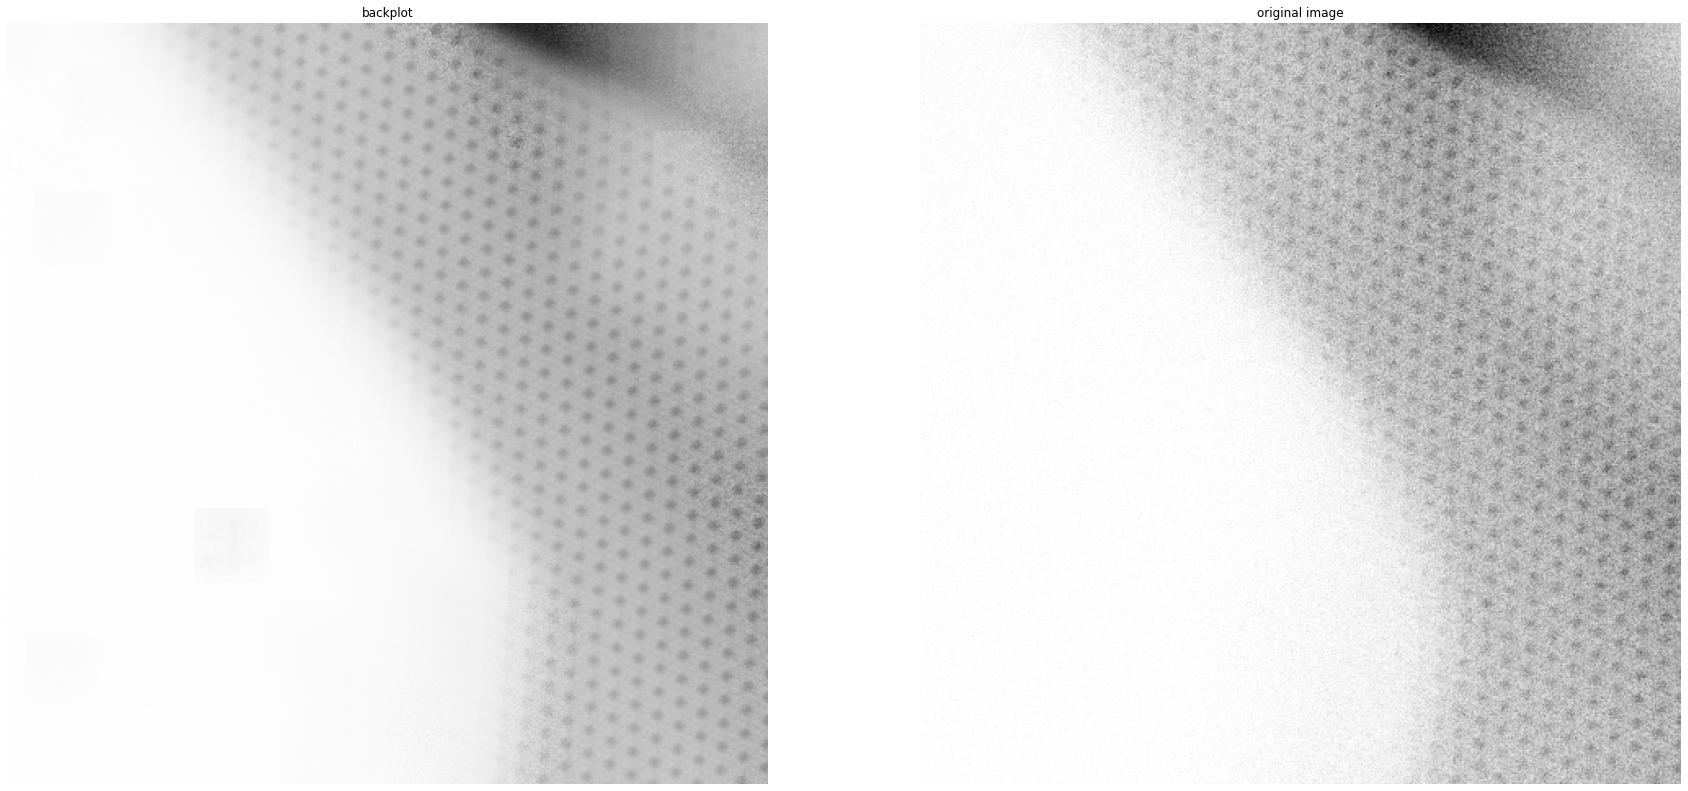

In [14]:
for i in range(len(imgs)):
    plt.figure(figsize=(2*15, 2*7)) 
    ax1=plt.subplot(1,2,1)                    
    ax1.imshow(backplotFinal[i][radius:-radius,radius:-radius],cmap=plt.cm.gray,vmin=min[i],vmax=max[i])
    ax1.set_title('backplot')
    ax1.axis('off')
    ax2=plt.subplot(1,2,2)                    
    ax2.imshow(imgs[i][radius:-radius,radius:-radius],cmap=plt.cm.gray,vmin=min[i],vmax=max[i])
    ax2.set_title('original image')
    ax2.axis('off')
    #plt.figure(figsize=(15, 12))  
    #plt.imshow(overlayclass[Mode][myindex],cmap=plt.cm.gist_rainbow)
    #plt.colorbar()
    plt.show()

# plt.savefig('C:/My Documents/TUD-MCL/Semester 4/Thesis/repo/img-denoiser/results/'+imgName+'-denoised.png')    

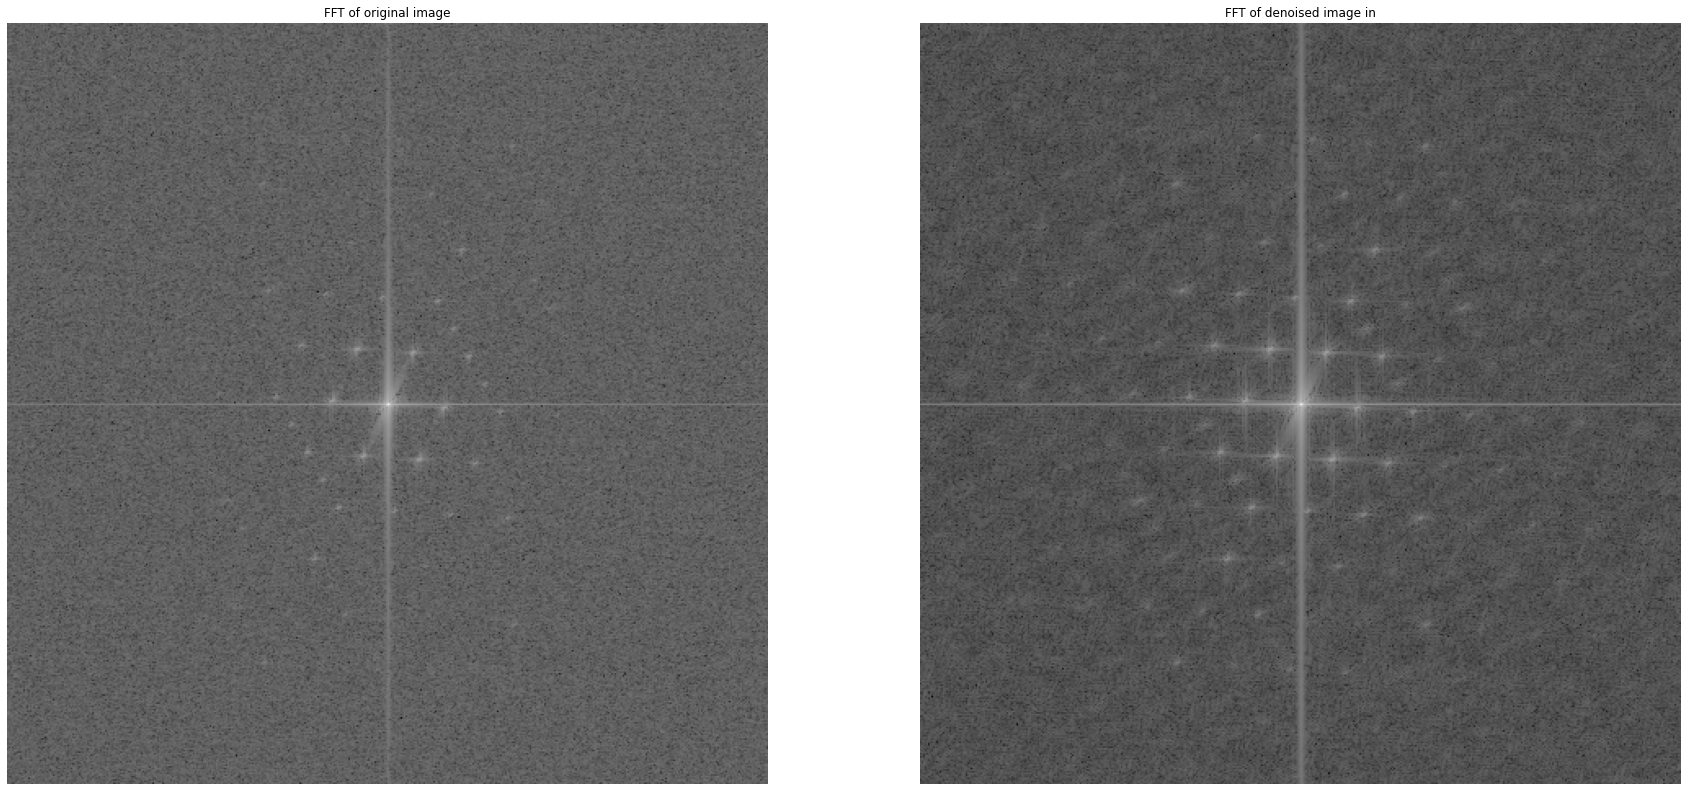

In [16]:
for i in range(len(imgs)):
    plt.figure(figsize=(2*15, 2*7)) 
    img = np.log(np.abs(np.fft.fftshift(np.fft.fft2(imgs[i][radius:-radius,radius:-radius]))))
    ax1=plt.subplot(1,2,1)
    ax1.imshow(img,cmap='gray')
    ax1.axis('off')
    ax1.set_title('FFT of original image')
    img = np.log(np.abs(np.fft.fftshift(np.fft.fft2(backplotFinal[i][radius:-radius,radius:-radius]))))
    ax1=plt.subplot(1,2,2)
    ax1.imshow(img,cmap='gray')
    ax1.axis('off')
    ax1.set_title('FFT of denoised image in')
    plt.show()